<h1 style="direction: rtl"> <b> תרגול 7: סימולציות סטוכסטיות </b> </h1>

<div style="direction: rtl"> סימולציה סטוכסטית היא סימולציה שבה מדמים תהליך שיש בו אירועים מקריים באמצעות מספרים אקראיים (ולא באמצעות פונקציות הסתברות) </div> 

<div style="direction: rtl">
    בשביל מספרים אקראיים, נייבא את numpy ונאתחל גנרטור
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(11_12_22)

<div>
    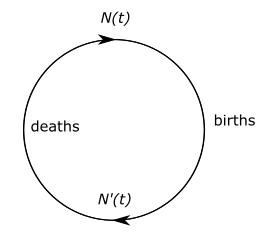
   <span style="direction: rtl; float: right">למשל, אנחנו רוצים לסמלץ גדילה של אוכלוסיית חתולים בקמפוס: 
    <br> כל שנה, יש שלב הולדה (למשל, עונת רבייה) בה לכל חתול יש: <ul>
    <li> $70\%$ סיכוי לא להביא אף גור (גורים + זכרים + נקבות שלא מולידות), </li>
    <li>$10\%$ סיכוי להוליד גור אחד,</li>
    <li>$10\%$ סיכוי להוליד שני גורים,</li>
    <li>$10\%$ סיכוי להוליד שלושה גורים,</li>
    </ul>
    <br> ושלב מוות <br> (למשל בחורף כשקר, אבל גם מבצע וטרינרי לעיקור או עזיבה מתאימים): <br> <ul> <li> $25\%$ סיכוי מוות/עיקור//עזיבה לכל חתול. </li> </ul></span>
</div>

---
<div style="direction: rtl"> בדרך כלל, סימולציה סטוכסטית תעשה בשני שלבים: </div>

<div style="direction: rtl"> $\bullet\qquad$ <b>אתחול</b>: מכינים את כל הפונקציות, רשימות, מערכים, ומשתני ריצה </div>

```python
num_cats = 10
cats_population = [num_cats]
number_of_years = 10
birthrate = np.zeros(number_of_years)
```

<div style="direction: rtl"> $\bullet \qquad$ <b>לולאת ריצה</b>: עוברים על כל צעד זמן אחד אחרי השני. בכל שלב מגרילים את הצעד הסטוכסטי (כמות לידות לחתול), מעדכנים את משתני הריצה, ושומרים ברשימות ומערכים שהכנו מראש</div>

```python
for year in range(number_of_years)
    current_num_cats += random_new_cats() # something with rng.random()
    cats_populations.append(current_num_cats)
```

<div style="direction: rtl"> בסוף, צריך לחשב סטטיסטיקות מעניינות או לשרטט (בדרך כלל בתא חדש)  </div>

```python
avg_population = cats_populations.mean()
plt.plot(cat_populations)
```

<div style="direction: rtl">
    נתחיל מ-10 חתולים ונריץ עשר צעדים (/שנים)
</div>

#### spoiler ##

In [2]:
# שלב איתחול initialization
num_years = 10
num_cats = 10
cat_population = [10]
births=(0,1,2,3)
p_births=(0.7,0.1,0.1,0.1)
p_death = 0.25

# שלב ריצה loop
for year in range(num_years):

    # birth phase
    new_cats = 0
    for cat in range(num_cats):
        new_cats += rng.choice(births,p=p_births)

    num_cats += new_cats
    cat_population.append(num_cats)

    # death phase
    dead_cats=0
    for cat in range(num_cats):
        dead_cats += rng.random()<0.25
    num_cats -= dead_cats

    cat_population.append(num_cats)

print(cat_population)

[10, 13, 8, 12, 11, 15, 14, 26, 20, 26, 21, 36, 28, 43, 34, 49, 38, 65, 56, 90, 69]


<div style="direction: rtl">
    נשים לב ששמרנו את מספר החתולים בהתחלה ופעמיים כל שנה: בשלב ההולדה ובשלב המוות (כמו שעשינו בשיעור): <br>
    $$N^\prime \left(t\right) = N\left(t\right) + births$$
    $$N^{\prime\prime}\left(t\right) = N^\prime \left(t\right) - deaths$$
    $$N\left(t+1\right) = N^{\prime\prime}$$ <br>
    אז אנחנו צריכים ציר זמן מתאים: <br>
    <code> N = [N0, N'0, N''0=N1, N'1, N1''=N2, N'2, N3, N'3, N4, N'4, N5] </code> <br>
    <code> t = [0 , 0.9,   1     , 1.9,   2    , 2.9, 3 , 3.9, 4 , 4.9, 5] </code>
</div>

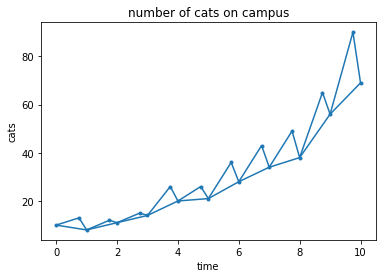

In [3]:
time = np.zeros(2*num_years+1)
time[::2] = np.arange(num_years+1) # full cycle, N(t)
time[1::2] = np.arange(num_years)+0.75 # partial cycle N'(t)

plt.plot(time,cat_population,'C0.-') # first color dots
plt.plot(time[::2],cat_population[::2])
plt.xlabel("time")
plt.ylabel("cats")
plt.title("number of cats on campus")
plt.show()

#### ... ####

<div style="direction: rtl"> אפשר לבטא כמעט כל סוג של דינמיקה עם סימולציות כאלה, בלי הרבה אנליזה של הסתברויות: רק לקחת את המודל וליישם אותו צעד אחרי צעד.</div> 

<div style="direction: rtl"> הבעייה היא שהסימולציות האלה מאוד לא יעילות: בכל פרק זמן אנחנו עוברים בלולאה על כל פרט באוכלוסייה, מה שמאוד איטי לאוכלוסיות גדולות: אם היו לנו 1,000 חתולים בעיר, היה לוקח פי 10 יותר זמן, ו100,000 חיידקים היה לוקח פי 1000 יותר.  <br> במיוחד בפייתון ו-numpy, כל לולאה שאפשר להחליף בפעולה על מערך היא בערך פי 100 יותר מהירה. <br> הרחבת רשימה עם append. היא, באופן מפתיע, יחסית מהירה, אבל להפוך את הרשימה למערך משווה ביניהם (וצריך להפוך למערך אם רוצים שדברים כמו גרפיקה וחישובים ימשיכו להיות מהירים)</div>

In [4]:
%%timeit
N=[]
for i in range(1_000_000):
    N.append(i)
# N=np.array(N) # +60ms more just because we need to iterate the list

122 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%%timeit
N=np.zeros(1_000_000)
for i in range(1_000_000):
    N[i]=i

163 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
N=np.arange(1_000_000)

1.02 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## <div style="direction: rtl"> דמוגרפיה סטוכסטית </div> ##

<div style="direction: rtl"> במקום לעבור על כל פרט, ראינו בשיעור שאפשר לקחת מודל מופשט: מניחים שהאוכלוסייה גדלה לפי הסתברות פואסון: כל צעד ניקח את $N\left(t+1\right)$ מתוך התפלגות, מה שנקרא <b>"סטוכסטיות דמוגרפית"</b>. <br> בכללי רואים את הסתברות פואסון הרבה כשיש לנו מקרים <b> בדידים</b> בתווך של פרק זמן <b>רציף</b> שלא קשורים זה לזה (אין זיכרון), למשל: <ul> <li> אוטובוסים שונים שמגיעים לתחנה ברבע שעה </li> <li> מספר מוטציות בתא בשנה </li> <li> מספר באגים שכתבנו בשעה האחרונה </li> </ul> <br> 
אם אנחנו מניחים שבכל דור המיתות והלידות פחות-או-יותר קורות בפרק זמן רציף ואינן תלויות ביניהן (מה שלא ממש נכון אבל קרוב מספיק לאוכלוסייה גדולה), אנחנו במצב דומה: <br> כמו שיש "בממוצע $1.5$ אוטובוסים עוברים התחנה כל שעה" או "בממוצע שבע מוטציות קורות בשבוע", יש לנו בממוצע "$R N$ לידות בכל דור"</div>

$$ p\left(k\right)= \frac{\lambda^k e^{-\lambda}}{k!}$$

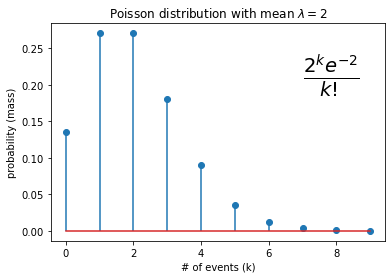

In [7]:
import scipy.stats as stats
lam = 2
n=np.arange(10)
poisson_pmf = stats.poisson.pmf(n,lam)
plt.stem(n, poisson_pmf)
plt.xlabel('# of events (k)')
plt.ylabel('probability (mass)')
plt.annotate(r'$\frac{2^k e^{-2}}{k!} $',(7,0.2),fontsize=28)
plt.title("Poisson distribution with mean $\\lambda=2$")
plt.show()

<div style="direction: rtl"> זה בניגוד להתפלגות בינומיאלית, שהסתברויות בודדות (probability mass) והפרמטר בדיד (N), ובניגוד להתפלגות אקספוננציאלית בה ההסתברויות רציפות (probability density) והפרמטר רציף.

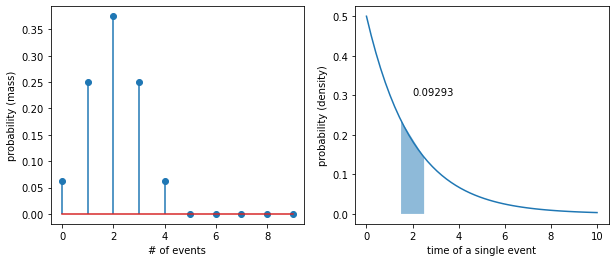

In [8]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].stem(stats.binom.pmf(n,lam/0.5,0.5))
axes[0].set_xlabel('# of events')
axes[0].set_ylabel('probability (mass)')

x = np.linspace(0,10)
exp_pmf = stats.expon.pdf(x,scale=lam)
prob_near_2 = stats.expon.pdf([1.5,2.5],scale=lam)
axes[1].plot(x,exp_pmf)
axes[1].fill_between([1.5,2.5],0,prob_near_2, alpha=0.5)
axes[1].annotate(f"{(prob_near_2[0]-prob_near_2[1]):.4}",(2,0.3))
axes[1].set_xlabel('time of a single event')
axes[1].set_ylabel('probability (density)')

plt.show()

<div style="direction: rtl"> נזכור מה אנחנו מנסים לעשות: יש לנו אוכלוסייה, שגידול גידול האוכלוסיה כל דור הוא<br>
    $$ N\left(t+1\right)=R N\left(t\right)$$
    אנחנו מניחים שההתפלגות היא פואסונית: יש לנו אירועים בדידים בפרק זמן רציף שאינם תלויים אחד בשני:
    $$ N\left(t+1\right)\sim\text{Poi}\left[\lambda=R N\left(t\right)\right] $$
</div>

<div style="direction: rtl"> ניקח אוכלוסייה עם מקדם גדילה $R=1.2$, ונראה מה גודל האוכלוסייה שמתחילה ב-10 פרטים אחרי 10 דורות. נראה את זה יחסית לפתרון האנליטי $N\left(t+1\right)=N\left(0\right)R^t$
</div>

In [9]:
R=1.2
N=np.zeros(11)
N[0]=10
for t in range(10):
    N[t+1]=rng.poisson(N[t]*R)

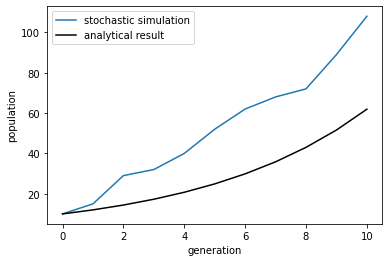

In [10]:
plt.plot(N, label="stochastic simulation")
plt.plot(10*R**np.arange(11),label="analytical result",color='k')
plt.xlabel('generation')
plt.ylabel('population')
plt.legend()
plt.show()

<div style="direction: rtl"> כל פעם שנריץ את התא למעלה, נקבל קו שונה: לפעמים מעל הקו האנליטי, ולפעמים מתחת. לכן, כמעט כל סימולציה סטוכסטית צריך לעשות ב<b>צבר</b> (ensemble) <br> צריך להריץ הרבה סימולציות ולבצע עליהן סטטיסטיקה.
</div>

In [11]:
R=1.2
# נכניס את הסימולציה לפונקציה
def simulate():
    N=np.zeros(11)
    N[0]=10
    for t in range(10):
        N[t+1]=rng.poisson(N[t]*R)
    return N

In [12]:
Ns = np.array(
    [simulate() for i in range(100)]
).T # נריץ את הסימולציה 100 פעמים

Extinct populations:  3


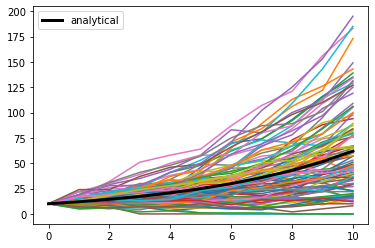

In [13]:
plt.plot(Ns)
plt.plot(10*R**np.arange(11),label="analytical",color='k',linewidth=3)
plt.legend()
print("Extinct populations: ",(Ns[-1,:]==0).sum())

<div style="direction: rtl"> אפשר לראות שיש סיכוי קטן שהאוכלוסייה תכחד, ויש סיכוי קטן להגיע לאוכלוסיות של $\approx 175$.
</div>

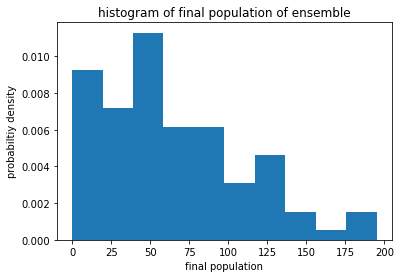

In [14]:
plt.hist(Ns[-1,:], density=True)
plt.xlabel('final population')
plt.ylabel('probabiltiy density')
plt.title('histogram of final population of ensemble')
plt.show()

<div style="direction: rtl"> אפשר גם לסמלץ מקרה שקצב הגידול תלוי באוכלוסייה $R\left(N\right)$, כמו במקרה הלוגיסטי
</div>

$$ N\left(t+1\right)\sim \text{Poi}\left[\lambda=N\left(t\right)+rN\left(t\right)\left(1-\frac{N\left(t\right)}{K}\right)\right]$$

<div style="direction: rtl"> עכשיו יש התפלגות פואסון עם ממוצע של $R N$ כשגם $R$ תלוי בגודל האוכלוסייה. נקח $r=0.2$ ו-$k=75$. <br> בנוסף, נכין את הקוד בשביל הצבר: במקום לבצע כל סימולצית אוכלוסייה בנפרד, אפשר לאתחל את כל הסימולציות $N\left(t,i\right)$ ולרוץ עליהן ביחד. נחסוך הרבה זמן על ידי הרצת <code>rng.poisson</code> עם מערך $\lambda$, שיתן את גודל האוכלוסייה הבא לכל סימולציה בצבר.
</div>

In [15]:
r=0.2
k=75
years=50

Ns=np.zeros((years+1,100))
Ns[0,:]=10

for t in range(years):
    Ns[t+1,...]=rng.poisson(
        Ns[t,...]*(1+r*(1-Ns[t,...]/k))
    )

In [16]:
rng.poisson?

Docstring:
poisson(lam=1.0, size=None)

Draw samples from a Poisson distribution.

The Poisson distribution is the limit of the binomial distribution
for large N.

Parameters
----------
lam : float or array_like of floats
    Expected number of events occurring in a fixed-time interval,
    must be >= 0. A sequence must be broadcastable over the requested
    size.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``lam`` is a scalar. Otherwise,
    ``np.array(lam).size`` samples are drawn.

Returns
-------
out : ndarray or scalar
    Drawn samples from the parameterized Poisson distribution.

Notes
-----
The Poisson distribution

.. math:: f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}

For events with an expected separation :math:`\lambda` the Poisson
distribution :math:`f(k; \lambda)` describes the probability of
:math:`k` ev

In [17]:
N_det=np.zeros(years+1)
N_det[0]=10
for t in range(years):
    N_det[t+1]= N_det[t,...]*(1+r*(1-N_det[t,...]/k))

Extinct populations:  6


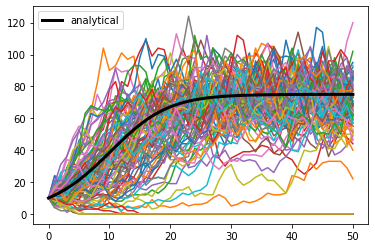

In [18]:
plt.plot(Ns)
plt.plot(N_det,label="analytical",color='k',linewidth=3)
plt.legend()
print("Extinct populations: ",(Ns[-1,...]==0).sum())

<div style="direction: rtl"> רוב הפתרונות דומים לפתרון הדיטרמיניסטי, אבל יש אחוז משמעותי מהסימולציות בהן האוכלוסיות נכחדות בזמן הראשוני של אוכלוסייה קטנה, ושאר הזמן גודל האוכלוסייה מתנדנד מאוד סביב ערך שיווי המשקל.
</div>

<div style="direction: rtl"> צריך לשים לב שלא תמיד התנהגות מסובכת היא בגלל משתנים סטוכסטים: למשל כשמגיעם ל-$r$ גדול מאוד</div>

In [19]:
r = 2.7
k=75
years=10
# the logistic map next N = N(1+r(N/k))
# We can't have negative population, so we need a ReLu
logistic_map = lambda n: np.maximum(0,n*(1+r*(1-n/k)))

# 50 stochastic simulations
Ns_sto=np.zeros((years+1,50))
Ns_sto[0,:]=10
for t in range(years):
    Ns_sto[t+1,...]=rng.poisson(logistic_map(Ns_sto[t,...]))

# 50 deterministic simulations
Ns_det = np.zeros((years+1,50))
Ns_det[0,:]=10
for t in range(years):
     Ns_det[t+1,:] = logistic_map(Ns_det[t,:])

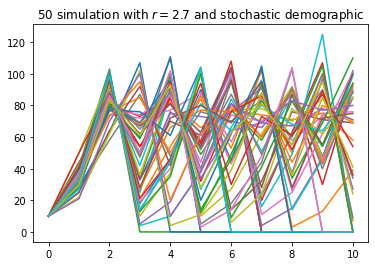

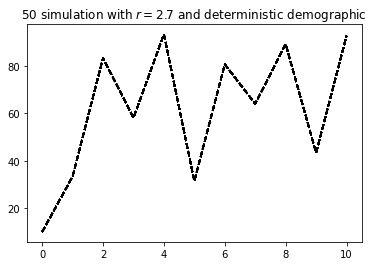

In [20]:
plt.plot(Ns_sto)
plt.title("50 simulation with $r=2.7$ and stochastic demographic")
plt.show()
plt.plot(Ns_det,"--k",linewidth=1.5)
plt.title("50 simulation with $r=2.7$ and deterministic demographic")
plt.show()

<div style="direction: rtl">
    האוכלוסייה מתנדנדת בחוזקה כי $r\left(1-n/k\right)$ מתנדנד בין ערכים חיוביים לשליליים: חזרנו על הסימולציה 50 פעמים וקיבלנו התנהגות כאוטית אבל היא זהה בכל הסימולציות. 
</div>

## <div style="direction: rtl"> גידול אוכלוסייה סטוכסטית סביבתית </div> ##

<div style="direction: rtl"> יש לנו אוכלוסייה, שגידול גידול האוכלוסיה אקספוננציאלי<br>
    $$ N\left(t+1\right)=R N\left(t\right)$$
    במציאות הסביבה אינה קבועה: בכל שנה מזג האוויר, כמות מזון, מחלות, וכו' משתנים ולכן גם קצב גידול האוכלוסייה לא קבוע. זה נקרא <b> סטוכסטיות סביבתית</b><br>
    במקרה הזה, נניח שיש שנים טובות ושנים רעות:
    $$ R\sim\begin{cases} R_g & p \\  R_b & 1-p \end{cases} $$
</div>

<div style="direction: rtl"> ניקח 10 דורות עם $R_g=1.5,R_b=0.5,p=0.7$ ונעשה צבר של 50 סימולציות
</div>

In [21]:
R_g = 1.5
R_b = 0.5
p=0.7

years=10
n=10
N=[n]
for t in range(years):
    R = R_g if rng.random()<p else R_b
    n = R*n
    N.append(n)

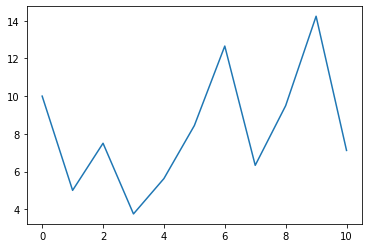

In [22]:
plt.plot(N)
plt.show()

<div style="direction: rtl"> בשביל הצבר, נעשה שני שיפורים: <br> נבצע את המשוואות על מערכים כך נעבור על כל הצבר מלולאה. <br> נגריל מראש את כל ערכי $R$ עם קריאה אחת ל-()rng.random.
</div>

In [23]:
R_g = 1.5
R_b = 0.5
p=0.7

years=10
n_sims = 50

Ns = np.zeros((years+1,n_sims))
Ns[0,:]=10


In [24]:
rand = rng.random(Ns.shape)<p # True and False
R = np.where(rand,R_g,R_b)
rand[:5,:5],R[:5,:5] # show the first 5x5 part of the matrix

(array([[False,  True,  True,  True,  True],
        [ True,  True, False,  True,  True],
        [ True, False,  True,  True, False],
        [ True,  True,  True,  True, False],
        [False,  True, False,  True,  True]]),
 array([[0.5, 1.5, 1.5, 1.5, 1.5],
        [1.5, 1.5, 0.5, 1.5, 1.5],
        [1.5, 0.5, 1.5, 1.5, 0.5],
        [1.5, 1.5, 1.5, 1.5, 0.5],
        [0.5, 1.5, 0.5, 1.5, 1.5]]))

In [25]:
for t in range(years):
    Ns[t+1,...] = R[t,...]*Ns[t,...]

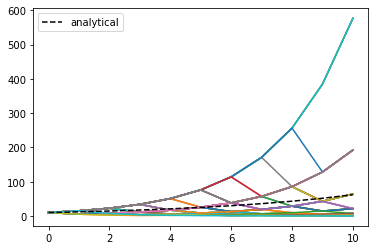

minimal population size:  0.087890625


In [26]:
plt.plot(Ns)
R_mean = R_g*p+R_b*(1-p)
plt.plot(10*R_mean**np.arange(11),"--k", label="analytical", linewidth=1.5)
plt.legend()
plt.show()
print("minimal population size: ", Ns.min())

<div style="direction: rtl">
    בגלל שיש פה התפלגות ברנולית (מטבע מוטה), יש לנו "עץ" של האוכלוסייה האפשרית, תלוי אם היו שנים טובות או רעות. מצד שני אין לנו אף פעם מקרה של הכחדות (כי האוכלוסייה יכולה להיות שבר).
</div>

<div style="direction: rtl">
    .במודל הלוגיסטי
    $$ N\left(t+1\right) = N\left(t\right) + r N\left(t\right) \left(1-\frac{N\left(t\right)}{K}\right) $$
    $r$ הוא הפרמטר שיותר מתאים לדמוגרפיה (כמו לידות לפרט וקצב מיתות טבעי), ו-$k$ כושר הנשיאה (carrying capacity) הוא הפרמטר שיותר מתאים לסביבה, למשל כמות המזון הזמינה.<br>
    ניקח את $k$ להיות סטוכסטי עם שנים טובות $k=100$ ושנים רעות $k=30$ (ואם כושר נשיאה ממוצע $75$)
$$ k\sim\begin{cases}100 & p=\frac{12}{17} \\ 15 & q=\frac{5}{17} \end{cases}$$
</div>

In [27]:
r = 0.2
k_g = 100
k_b = 15
p=12/17

years=50
n_sims = 50
logistic_map = lambda n,k: n*(1+r*(1-n/k))

Ns = np.zeros((years+1,n_sims))
Ns[0,:]=10

rand = rng.random(Ns.shape)<p # True and False
Ks = np.where(rand,k_g, k_b)

for t in range(years):
    Ns[t+1,...]= logistic_map(Ns[t,...],Ks[t,...])

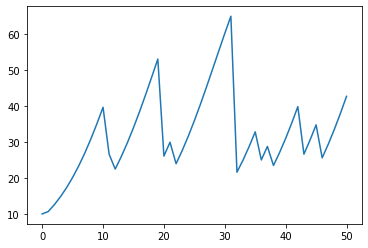

In [28]:
plt.plot(Ns[:,0])
plt.show()

In [29]:
def simulate_env_log_det(k):
    n=10
    N=[n]
    for t in range(50):
        n = n*(1+r*(1-n/k))
        N.append(n)
    return N

In [30]:
k_mean = k_g * p + k_b*(1-p)
N_good = simulate_env_log_det(k_g)
N_mean = simulate_env_log_det(k_mean)
N_bad = simulate_env_log_det(k_b)

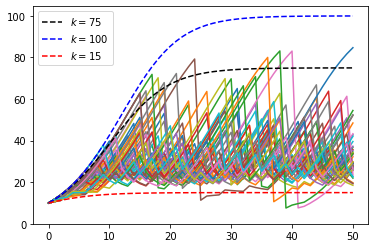

In [31]:
plt.plot(Ns)
plt.plot(N_mean,"--k",linewidth=1.5, label=r"$k=75$")
plt.plot(N_good,"--b",linewidth=1.5, label=r"$k=100$")
plt.plot(N_bad,"--r",linewidth=1.5, label=r"$k=15$")
plt.ylim(0)
plt.legend()
plt.show()

<div style="direction: rtl"> אנחנו רואים שהאוכלוסיה מתנדנדת בין כושר הנשיאה של השנים הטובות לכושר הנשיאה בשנים הרעות. בפרמטרים של השנים הרעות $ k=15,r=0.2$ יש אוסילציות סביב נקודת שיווי המשקל ולכן בשנים רעות האוכלוסייה יכולה לרדת מתחת לכושר הנשיאה. בניגוד לזה, בפרמטרים של השנים הטובות $k=100,r=0.2$ אין אוסילציות ולכן אנחנו אף פעם לא עוברים את כושר הנשיאה. </div> 